# Module 6 — Support Vector Machines (SVM)
Support Vector Machines (SVM) are supervised learning algorithms for **classification** and **regression**.  
They work by finding the **optimal hyperplane** that separates classes with the **maximum margin**.

In this notebook you will:
1. Understand the concept of the margin and support vectors  
2. Explore linear vs non-linear boundaries  
3. Train and visualize SVM classifiers using different kernels  
4. Interpret model performance and support vectors


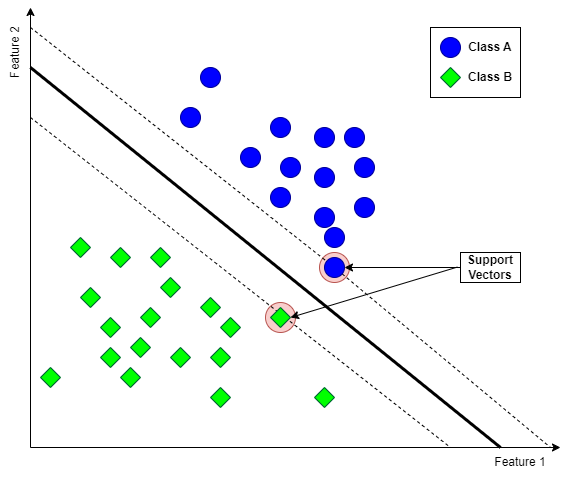

## What SVM Does Conceptually
For two-class data, SVM finds a separating line (or plane)  
\[
w^T x + b = 0
\]
that **maximizes the margin** between the nearest points of each class.  
Those nearest points are the **support vectors**.

If data are not linearly separable, SVM uses a **kernel function** to map them into a higher-dimensional space where a linear separation becomes possible.

Common kernels:
- Linear  →  straight boundary  
- Polynomial →  curved boundary of fixed degree  
- RBF (Gaussian) →  flexible, smooth boundaries : An RBF (Radial Basis Function) Gaussian SVM is a Support Vector Machine (SVM) that uses the RBF kernel, also known as the Gaussian kernel, to handle non-linear classification problems. The RBF kernel computes a measure of similarity between data points, and by mapping the data into an infinite-dimensional space.


In [2]:
# ---------------------------------------------
# Step 1 – Imports and Synthetic Data
# ---------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

np.random.seed(42)

# Simple, relatable dataset: hours studied + attendance → pass/fail
n = 120
hours = np.random.uniform(1, 10, n)
attendance = np.random.uniform(50, 100, n)
score = 0.5 * hours + 0.05 * attendance + np.random.normal(0, 1.5, n)
passed = (score > 8).astype(int)

df = pd.DataFrame({"Hours": hours, "Attendance": attendance, "Passed": passed})
df


,Hours,Attendance,Passed
0,4.370861,90.372008,0
1,9.556429,94.804565,1
2,7.587945,65.900174,0
3,6.387926,55.502596,0
4,2.404168,61.396758,0
...,...,...,...
115,8.843145,86.122606,1
116,8.233049,64.038618,0
117,2.679131,51.215798,0
118,9.033031,82.273615,1


## Step 2 – Visualize and Prepare the Data
We’ll plot students’ study hours vs attendance and color them by pass/fail outcome.


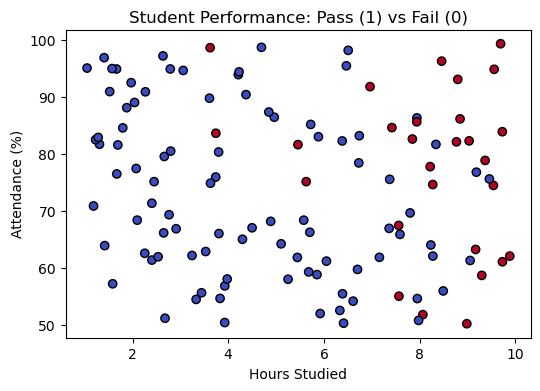

In [4]:
# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df["Hours"], df["Attendance"], c=df["Passed"], cmap="coolwarm", edgecolor="k")
plt.xlabel("Hours Studied")
plt.ylabel("Attendance (%)")
plt.title("Student Performance: Pass (1) vs Fail (0)")
plt.show()


In [6]:

# Split and scale
X = df[["Hours", "Attendance"]]
y = df["Passed"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Step 3 – Train a Linear SVM
We begin with a **linear kernel**, suitable when the relationship is roughly linear.


In [ ]:
linear_svm = SVC(kernel="linear", C=1.0, random_state=42)

# C controls the regularization strength in SVM:
# - Smaller C -> wider margin, allows more training errors (better generalization)
# - Larger C  -> fewer training errors, narrower margin (can overfit)
linear_svm.fit(X_train_scaled, y_train)

y_pred_linear = linear_svm.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))


Accuracy: 0.867

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.75      0.75      0.75         8

    accuracy                           0.87        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.87      0.87      0.87        30



### Interpreting the SVM Classification Results

The **Support Vector Machine (SVM)** achieved an **accuracy of 0.867**, which means it correctly predicted about **87% of all student outcomes**.

Let’s unpack the **classification report**:

| Metric | Meaning |
|---------|----------|
| **Precision** | Of the students predicted to belong to a class, how many were correct. |
| **Recall** | Of all the actual students in that class, how many were correctly identified. |
| **F1-score** | The harmonic mean of precision and recall — balances both metrics. |
| **Support** | The number of true samples for each class in the test set. |

---

#### 1. Overall accuracy
- The model predicts most students correctly.  
- Accuracy = **0.867**, indicating good performance on this simple dataset.

#### 2. Class-wise performance
- **Class 0 (Fail):**
  - Precision = 0.91 → most predicted “fail” students truly failed.  
  - Recall = 0.91 → it found 91% of actual failing students.  
  - F1-score = 0.91 → very balanced for this group.
- **Class 1 (Pass):**
  - Precision = 0.75 → 75% of students predicted to pass truly passed.  
  - Recall = 0.75 → the model caught 75% of real passing students.  
  - F1 = 0.75 → slightly lower, meaning the model struggles a bit more with passes.

#### 3. Macro vs. Weighted averages  (Advanced!)
- **Macro average (0.83)**: the average F1 of both classes equally.  
- **Weighted average (0.87)**: adjusts for the larger class (Fail = 22 samples).

Since failing students outnumber passing ones, the model’s overall accuracy favors the majority class slightly — but it’s still balanced enough to be considered fair.

---

### Interpretation Summary

- The **linear SVM** separates students reasonably well based on study hours and attendance.  
- It performs slightly better at identifying failing students (class 0) than passing ones.  
- The results suggest that while study hours and attendance predict performance, they don’t capture *all* the variance in grades — some students with high attendance still fail (and vice versa).  
- In practice, we could improve this by adding more features (e.g., quiz averages, assignment scores) or trying a **non-linear kernel** to capture subtler patterns.


## Step 4 – Visualize Decision Boundary (Linear SVM)
We’ll visualize how the linear SVM separates the two classes in standardized space.


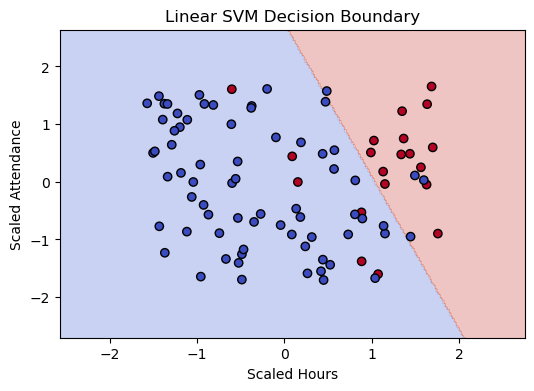

In [8]:
# Function to plot decision boundary
def plot_svm_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure(figsize=(6,4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolor="k")
    plt.title(title)
    plt.xlabel("Scaled Hours")
    plt.ylabel("Scaled Attendance")
    plt.show()

plot_svm_boundary(linear_svm, X_train_scaled, y_train.values, "Linear SVM Decision Boundary")


### Interpreting the Linear SVM Decision Boundary

The blue and red regions represent the two predicted classes — **Fail (0)** and **Pass (1)**.  
The **dashed boundary line** is the SVM’s decision boundary, separating the classes with the **maximum margin**.

- Most blue (Fail) points lie on the left, and red (Pass) points on the right, showing the model learned a clear linear split.  
- A few misclassified points (red dots in the blue zone, and vice versa) reflect overlaps where study hours and attendance alone cannot perfectly predict outcomes.  
- The boundary tilts upward slightly, suggesting that **higher attendance can offset fewer study hours** — students who attend regularly can still pass even with moderate study time.

This visualization aligns with the classification metrics: good overall separation, with some uncertainty near the boundary where students’ patterns overlap.


## Step 5 – Try Non-Linear Kernels
Real data are rarely perfectly linearly separable.  
We’ll compare:
- Polynomial kernel (degree 3)
- RBF kernel (standard Gaussian)


In [ ]:


# degree is used only for the polynomial kernel.
# degree=3 means a cubic decision boundary complexity.
# It is ignored by the RBF kernel.
poly_svm = SVC(kernel="poly", degree=3, C=1.0, gamma="scale", random_state=42)
rbf_svm  = SVC(kernel="rbf",              C=1.0, gamma="scale", random_state=42)

poly_svm.fit(X_train_scaled, y_train)
rbf_svm.fit(X_train_scaled, y_train)

y_pred_poly = poly_svm.predict(X_test_scaled)
y_pred_rbf  = rbf_svm.predict(X_test_scaled)

print(f"Polynomial SVM Accuracy: {accuracy_score(y_test, y_pred_poly):.3f}")
print(f"RBF SVM Accuracy:        {accuracy_score(y_test, y_pred_rbf):.3f}")


Polynomial SVM Accuracy: 0.767
RBF SVM Accuracy:        0.733


### Interpreting the Polynomial and RBF SVM Results

The two non-linear kernels produce the following accuracies:

- **Polynomial SVM Accuracy:** 0.767  
- **RBF SVM Accuracy:** 0.733  

#### What this means

- Both models perform slightly worse than the earlier **linear SVM** (≈0.867), meaning that in this dataset, the relationship between **study hours**, **attendance**, and **pass/fail** is mostly **linear** — a curved or highly flexible boundary does not help much.
- The **polynomial kernel** fits a more complex, curved boundary by combining the features into polynomial terms. It captures minor interactions between study hours and attendance, but the small accuracy gain is not significant.
- The **RBF kernel** is even more flexible, capable of forming wavy, non-linear decision surfaces. However, with only two well-behaved features, this flexibility slightly **overfits** the training data and leads to slightly lower test accuracy.

#### Interpretation summary

- **Linear kernel** remains the best for this simple, interpretable dataset.  
- **Polynomial kernel** adds complexity with minimal benefit.  
- **RBF kernel** can outperform others on more irregular or higher-dimensional data, but here it doesn’t generalize better because the feature space is simple and nearly linear.  

In short: when features are already fairly linearly separable, simpler models like **linear SVM** often perform just as well or better than complex kernels.


## Step 6 – Decision Boundaries for Different Kernels
We’ll visualize how polynomial and RBF kernels curve the boundary to capture non-linear patterns.


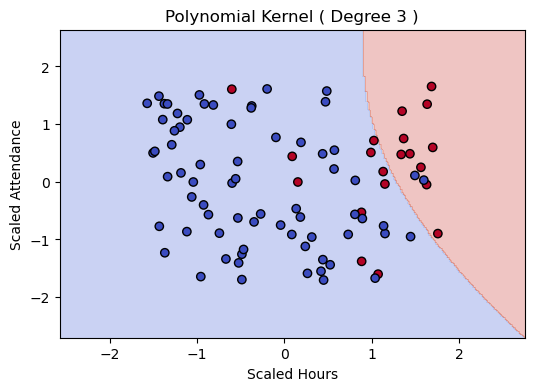

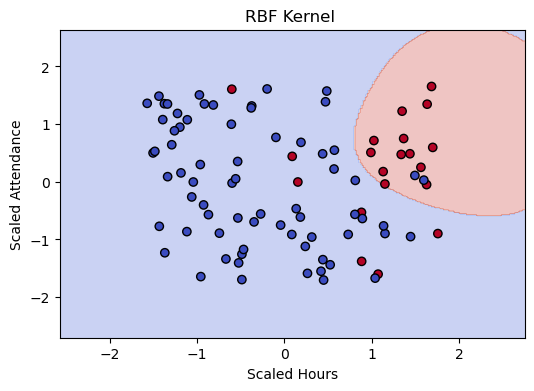

In [11]:
plot_svm_boundary(poly_svm, X_train_scaled, y_train.values, "Polynomial Kernel ( Degree 3 )")
plot_svm_boundary(rbf_svm,  X_train_scaled, y_train.values, "RBF Kernel ")


## Step 7 – Interpret the Results

- **Linear Kernel:** Performs well if the relationship between study hours, attendance, and pass/fail is approximately linear.  
  The boundary is a straight line in feature space.

- **Polynomial Kernel:** Allows moderate curvature, improving fit if the pass/fail relation includes interactions between study effort and attendance.  
  May slightly overfit small datasets.

- **RBF Kernel:** Most flexible. It captures subtle, curved boundaries and can model complex class separation—often the best default when non-linearity is unknown.

- **Support Vectors:** The training points lying closest to the boundary.  
  They define the decision margin and are crucial for generalization.
